# Intro to Regression with Keras

**OBJECTIVES**

- Build regression models using `keras`
- Refine models adjusting the architecture of a network
- Use regularization to attempt performance improvement
- Save and reuse the model

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

from sklearn.datasets import fetch_california_housing
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

import tensorflow as tf
import keras
from keras.models import Sequential
from keras.layers import Dense, Dropout, BatchNormalization, InputLayer
from keras.regularizers import l1, l2, l1_l2

In [2]:
cali = fetch_california_housing()
X, y = cali.data, cali.target

In [3]:
tf.keras.backend.set_floatx('float64')

In [4]:
print(cali.DESCR)

.. _california_housing_dataset:

California Housing dataset
--------------------------

**Data Set Characteristics:**

    :Number of Instances: 20640

    :Number of Attributes: 8 numeric, predictive attributes and the target

    :Attribute Information:
        - MedInc        median income in block
        - HouseAge      median house age in block
        - AveRooms      average number of rooms
        - AveBedrms     average number of bedrooms
        - Population    block population
        - AveOccup      average house occupancy
        - Latitude      house block latitude
        - Longitude     house block longitude

    :Missing Attribute Values: None

This dataset was obtained from the StatLib repository.
http://lib.stat.cmu.edu/datasets/

The target variable is the median house value for California districts.

This dataset was derived from the 1990 U.S. census, using one row per census
block group. A block group is the smallest geographical unit for which the U.S.
Census Bur

### Problem 1

Load the california housing data and create a dataframe called `cali_df` below.  Make sure to add the target feature and name this `price`. 

In [5]:
cali_df = pd.DataFrame(X, columns=(cali.feature_names))
cali_df['price'] = y
cali_df

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,price
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23,4.526
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22,3.585
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24,3.521
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25,3.413
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25,3.422
...,...,...,...,...,...,...,...,...,...
20635,1.5603,25.0,5.045455,1.133333,845.0,2.560606,39.48,-121.09,0.781
20636,2.5568,18.0,6.114035,1.315789,356.0,3.122807,39.49,-121.21,0.771
20637,1.7000,17.0,5.205543,1.120092,1007.0,2.325635,39.43,-121.22,0.923
20638,1.8672,18.0,5.329513,1.171920,741.0,2.123209,39.43,-121.32,0.847


### Problem 2

Create a train/test split with just the `MedInc` feature as your input.

In [6]:
X_train, X_test, y_train, y_test = train_test_split(cali_df[['MedInc']], cali_df['price'])

In [7]:
X_train.head()

,MedInc
13000,4.2273
11399,6.8645
19810,1.4821
8687,5.6254
19590,3.4934


In [8]:
X_test.head()

,MedInc
5149,0.5495
539,1.9427
5790,3.0441
16937,3.1620
4762,2.1711


In [9]:
y_train.head()

13000    1.418
11399    3.182
19810    1.433
8687     2.838
19590    1.938
Name: price, dtype: float64

In [10]:
y_test.head()

5149     0.917
539      1.022
5790     1.938
16937    4.150
4762     1.792
Name: price, dtype: float64

### Problem 3

Setup a `Sequential` model with one layer containing 24 nodes.  Make sure to include the output layer and use a relu activation for the hidden layer.

In [11]:
X_train.shape

(15480, 1)

In [12]:
model = Sequential()

In [13]:
Dense

tensorflow.python.keras.layers.core.Dense

In [14]:
InputLayer()

In [15]:
model.add(InputLayer(input_shape=(X_train.shape[1],))),
model.add(Dense(24, activation='relu'))
model.add(Dense(1))

### Problem 3

Set up the compilation of the network.  Use an adam optimizer and appropriate loss function with the mean squared error metric.

In [16]:
model.compile(optimizer='adam', loss='msle', metrics=['mean_squared_error'])

### Problem 4

Fit the model on the training data with 100 epochs (and sequester the output with `verbose = 0`). Save the fit model to the variable `history`.

In [17]:
history = model.fit(X_train, y_train, epochs=100, verbose=0, validation_data=(X_test, y_test))

In [18]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 24)                48        
_________________________________________________________________
dense_1 (Dense)              (None, 1)                 25        
Total params: 73
Trainable params: 73
Non-trainable params: 0
_________________________________________________________________


### Problem 5

Use `matplotlib` to plot the training loss and validation loss, and the training mean squared error alongside the validation data.  Side by side subplots please.

In [19]:
history.history.keys()

dict_keys(['loss', 'mean_squared_error', 'val_loss', 'val_mean_squared_error'])

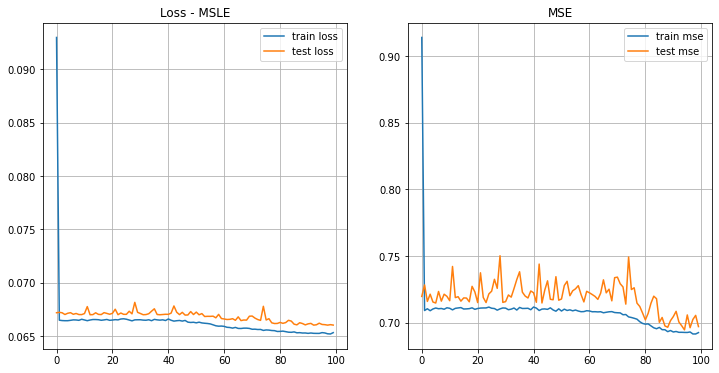

In [20]:
plt.figure(figsize=(12, 6))
plt.subplot(1,2,1)
plt.title('Loss - MSLE')
plt.plot(history.history['loss'], label='train loss')
plt.plot(history.history['val_loss'], label='test loss')
plt.legend();
plt.grid();
plt.subplot(1,2,2)
plt.title('MSE')
plt.plot(history.history['mean_squared_error'], label='train mse')
plt.plot(history.history['val_mean_squared_error'], label='test mse')
plt.legend();
plt.grid();

### Problem 6

Let's make a second network that is a bit deeper and more complex. Also, let's now use all the features and see if we help the model.  Use 3 layers, with 64, 128, and 64 nodes respectively in the hidden layers and a `relu` activation function.

In [21]:
model_2 = Sequential([
    keras.layers.InputLayer(input_shape=(X_train.shape[1],)),
    keras.layers.Dense(64, activation='relu'),
    keras.layers.Dense(128, activation='relu'),
    keras.layers.Dense(64, activation='relu'),
    keras.layers.Dense(1)
])

model_2.compile(optimizer='adam', loss='msle', metrics=['mean_squared_error', tf.keras.metrics.CosineSimilarity()])

history_2 = model_2.fit(X_train, y_train, epochs=100, verbose=0, validation_data=(X_test, y_test))

In [22]:
model_2.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_2 (Dense)              (None, 64)                128       
_________________________________________________________________
dense_3 (Dense)              (None, 128)               8320      
_________________________________________________________________
dense_4 (Dense)              (None, 64)                8256      
_________________________________________________________________
dense_5 (Dense)              (None, 1)                 65        
Total params: 16,769
Trainable params: 16,769
Non-trainable params: 0
_________________________________________________________________


In [23]:
history_2.history.keys()

dict_keys(['loss', 'mean_squared_error', 'cosine_similarity', 'val_loss', 'val_mean_squared_error', 'val_cosine_similarity'])

In [24]:
def plot_metrics(history):
    plt.figure(figsize=(20, 6))
    plt.subplot(1,3,1)
    plt.title('Loss - MSLE')
    plt.plot(history.history['loss'], label='train loss')
    plt.plot(history.history['val_loss'], label='test loss')
    plt.legend();
    plt.grid();
    plt.subplot(1,3,2)
    plt.title('MSE')
    plt.plot(history.history['mean_squared_error'], label='train mse')
    plt.plot(history.history['val_mean_squared_error'], label='test mse')
    plt.legend();
    plt.grid();
    plt.subplot(1,3,3)
    plt.title('Cosine Similarity')
    plt.plot(history.history['cosine_similarity'], label='train cosine sim')
    plt.plot(history.history['val_cosine_similarity'], label='test cosine sim')
    plt.legend();
    plt.grid();

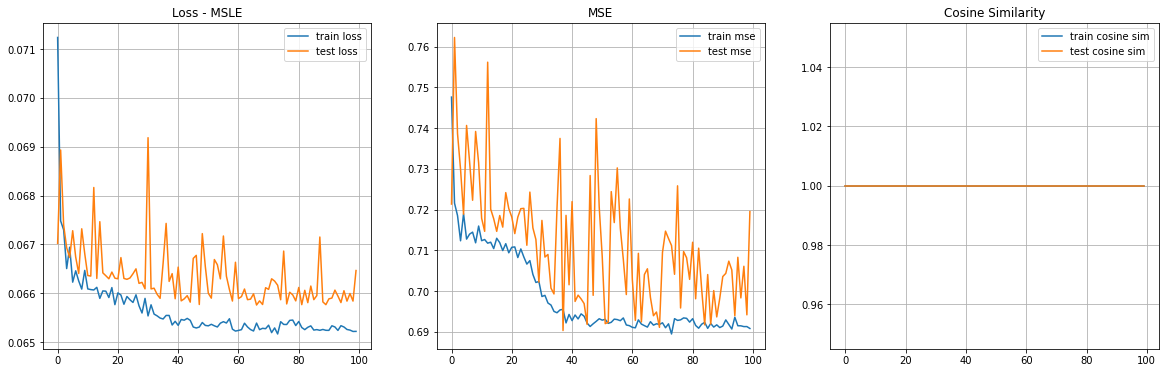

In [25]:
plot_metrics(history_2)

### Problem 7

Add a `BatchNormalization` layer prior to our first dense layer in the network above and repeat the fit.  Does this change anything?

In [26]:
model_3 = Sequential([
    keras.layers.InputLayer(input_shape=(X_train.shape[1],)),
    keras.layers.BatchNormalization(),
    keras.layers.Dense(64, activation='relu'),
    keras.layers.Dense(128, activation='relu'),
    keras.layers.Dense(64, activation='relu'),
    keras.layers.Dense(1)
])

model_3.compile(optimizer='adam', loss='msle', metrics=['mean_squared_error', tf.keras.metrics.CosineSimilarity()])

history_3 = model_3.fit(X_train, y_train, epochs=100, verbose=0, validation_data=(X_test, y_test))

In [27]:
model_3.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
batch_normalization (BatchNo (None, 1)                 4         
_________________________________________________________________
dense_6 (Dense)              (None, 64)                128       
_________________________________________________________________
dense_7 (Dense)              (None, 128)               8320      
_________________________________________________________________
dense_8 (Dense)              (None, 64)                8256      
_________________________________________________________________
dense_9 (Dense)              (None, 1)                 65        
Total params: 16,773
Trainable params: 16,771
Non-trainable params: 2
_________________________________________________________________


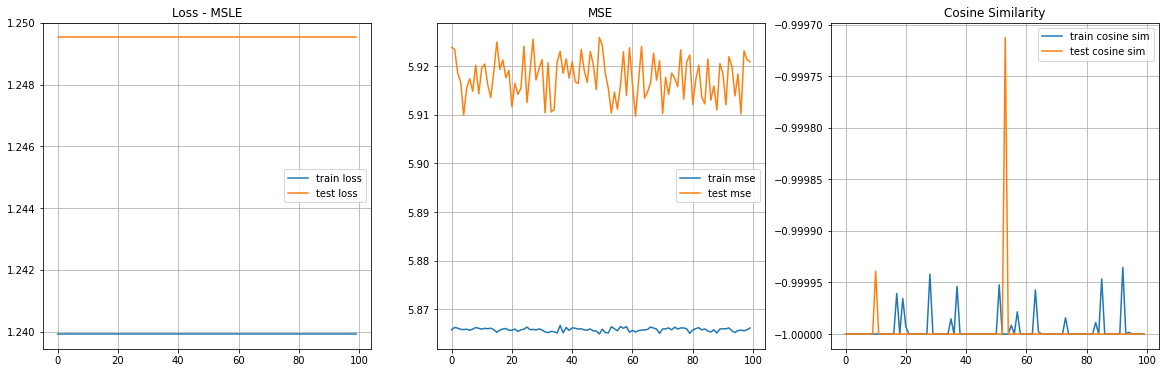

In [28]:
plot_metrics(history_3)

### Problem 8

Early Stopping.  It seems that we may not need all 100 epocs to train the data.  Include an `EarlyStopping` callback in your model from above.  Set the `patience` equal to 5.  How many epochs do you think are appropriate?

In [29]:
from keras.callbacks import EarlyStopping

In [30]:
early_stopping = EarlyStopping(monitor='val_loss', patience=3)

In [31]:
model_4 = Sequential([
    keras.layers.InputLayer(input_shape=(X_train.shape[1],)),
    keras.layers.BatchNormalization(),
    keras.layers.Dense(64, activation='relu'),
    keras.layers.Dense(128, activation='relu'),
    keras.layers.Dense(64, activation='relu'),
    keras.layers.Dense(1)
])

model_4.compile(optimizer='adam', loss='msle', metrics=['mean_squared_error', tf.keras.metrics.CosineSimilarity()])

history_4 = model_4.fit(X_train, y_train, epochs=100, verbose=0, validation_data=(X_test, y_test), callbacks=early_stopping)

In [32]:
model_4.summary()

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
batch_normalization_1 (Batch (None, 1)                 4         
_________________________________________________________________
dense_10 (Dense)             (None, 64)                128       
_________________________________________________________________
dense_11 (Dense)             (None, 128)               8320      
_________________________________________________________________
dense_12 (Dense)             (None, 64)                8256      
_________________________________________________________________
dense_13 (Dense)             (None, 1)                 65        
Total params: 16,773
Trainable params: 16,771
Non-trainable params: 2
_________________________________________________________________


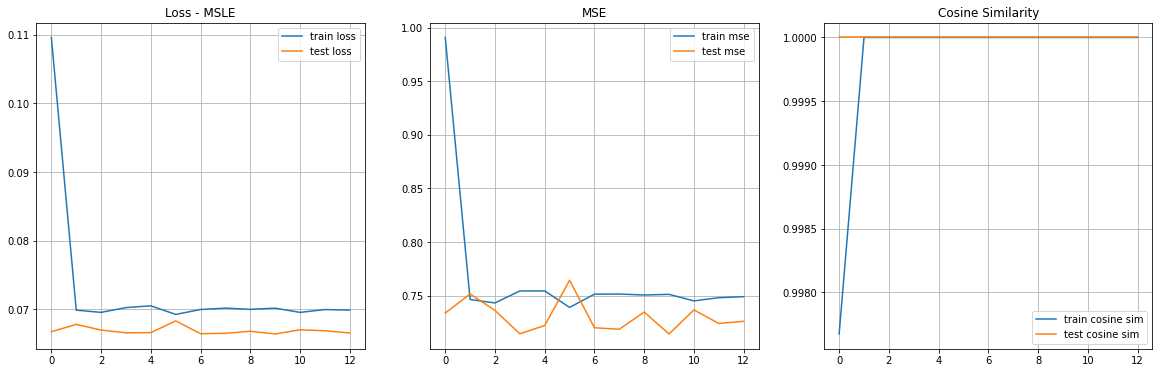

In [33]:
plot_metrics(history_4)

### Problem 9

Adding `Dropout`.  Let's add a 5% dropout to the second layer, and a 20% dropout to the third layer and see if we end up stopping sooner or performing better.

In [34]:
model_5 = Sequential([
    keras.layers.InputLayer(input_shape=(X_train.shape[1],)),
    keras.layers.BatchNormalization(),
    keras.layers.Dense(64, activation='relu'),
    keras.layers.Dropout(0.05),
    keras.layers.Dense(128, activation='relu', ),
    keras.layers.Dropout(0.2),
    keras.layers.Dense(64, activation='relu'),
    keras.layers.Dense(1)
])

model_5.compile(optimizer='adam', loss='msle', metrics=['mean_squared_error', tf.keras.metrics.CosineSimilarity()])

history_5 = model_5.fit(X_train, y_train, epochs=100, verbose=0, validation_data=(X_test, y_test), callbacks=early_stopping)

In [35]:
model_5.summary()

Model: "sequential_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
batch_normalization_2 (Batch (None, 1)                 4         
_________________________________________________________________
dense_14 (Dense)             (None, 64)                128       
_________________________________________________________________
dropout (Dropout)            (None, 64)                0         
_________________________________________________________________
dense_15 (Dense)             (None, 128)               8320      
_________________________________________________________________
dropout_1 (Dropout)          (None, 128)               0         
_________________________________________________________________
dense_16 (Dense)             (None, 64)                8256      
_________________________________________________________________
dense_17 (Dense)             (None, 1)                

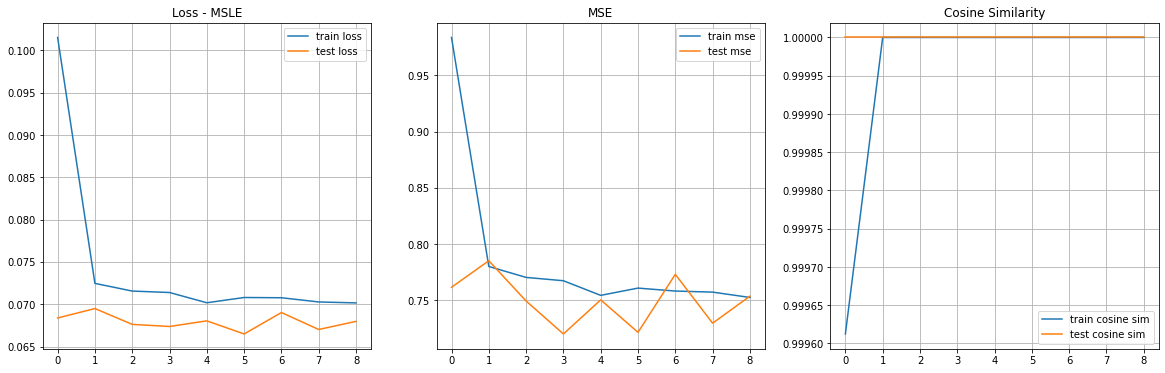

In [36]:
plot_metrics(history_5)

### Problem 9: RMSE vs. Baseline

Compare the model aboves performance to that of the baseline model for the data.

In [37]:
histories = [history, history_2, history_3, history_4, history_5]

In [38]:
baseline = np.ones(len(y_test)) * y_test.mean()

In [39]:
from sklearn.metrics import mean_squared_error

In [40]:
rsme_comparison = []
for i in histories:
    predictions = i.model.predict(X_test)
    rsme_comparison.append(mean_squared_error(y_test, predictions, squared=False))
rsme_comparison.append(mean_squared_error(y_test, baseline, squared=False))

In [41]:
rsme_comparison = pd.DataFrame(rsme_comparison, index=['model-1', 'model-2', 'model-3', 'model-4', 'model-5', 'baseline'], columns=['RSME'])

In [42]:
rsme_comparison['RSME']

model-1     0.834852
model-2     0.848232
model-3     2.433282
model-4     0.852093
model-5     0.868178
baseline    1.150570
Name: RSME, dtype: float64

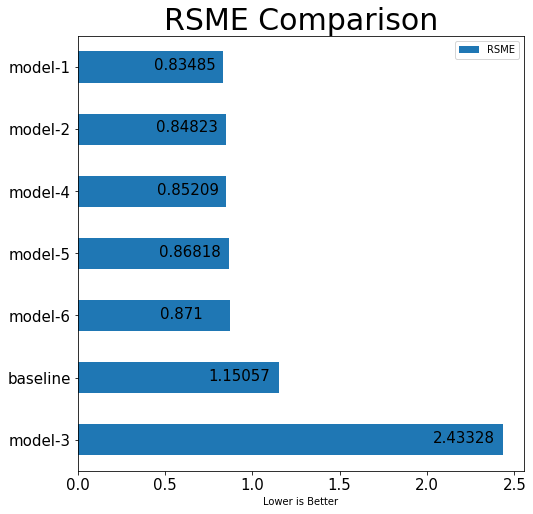

In [51]:
rsme_comparison.sort_values(by='RSME', ascending=False).plot(kind='barh', figsize=(8,8))
plt.title('RSME Comparison', fontsize=30)
plt.yticks(fontsize=15);
plt.xticks(fontsize=15);
plt.xlabel('Lower is Better')

for c, i in enumerate(rsme_comparison['RSME'].sort_values(ascending=False)):
    plt.annotate(round(i, 5), (i-0.4, c-0.05), fontsize=15)

### Problem 10: Regularization and Scaling

Finally, we want to see if regularizing will improve the model.  Feed a model that is identical to the one above including dropout and include `l2` regularization in each of the dense layers of 0.01.  What is the RMSE of this model?  How does it compare to the baseline?

In [44]:
from keras.regularizers import l2

In [45]:
model_6 = Sequential([
    keras.layers.InputLayer(input_shape=(X_train.shape[1],)),
    keras.layers.BatchNormalization(),
    keras.layers.Dense(64, activation='relu', kernel_regularizer=l2(0.01)),
    keras.layers.Dropout(0.05),
    keras.layers.Dense(128, activation='relu', kernel_regularizer=l2(0.01)),
    keras.layers.Dropout(0.2),
    keras.layers.Dense(64, activation='relu', kernel_regularizer=l2(0.01)),
    keras.layers.Dense(1, kernel_regularizer=l2(0.01))
])

model_6.compile(optimizer='adam', loss='msle', metrics=['mean_squared_error', tf.keras.metrics.CosineSimilarity()])

history_6 = model_6.fit(X_train, y_train, epochs=100, verbose=0, validation_data=(X_test, y_test), callbacks=early_stopping)

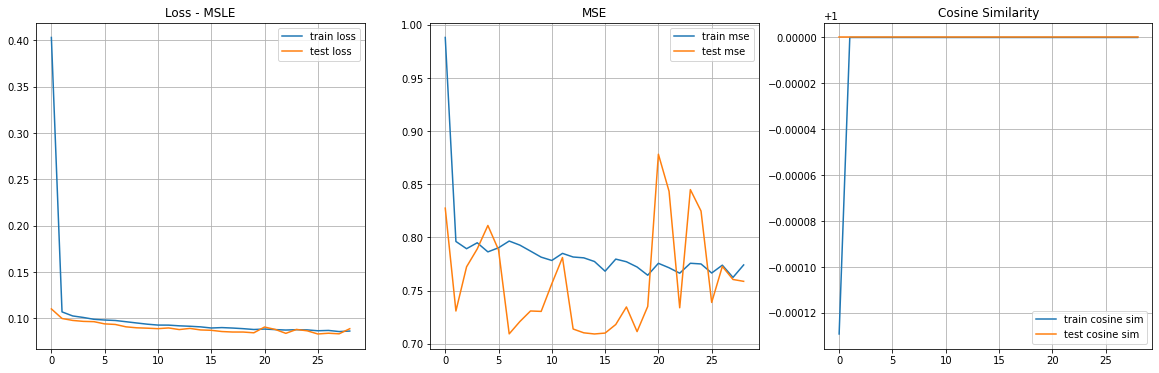

In [46]:
plot_metrics(history_6)

In [47]:
pd.DataFrame([mean_squared_error(y_test, model_6.predict(X_test), squared=False)], index=['model-6'], columns=['RSME'])

,RSME
model-6,0.871003


In [48]:
rsme_comparison = rsme_comparison.append(pd.DataFrame([mean_squared_error(y_test, model_6.predict(X_test), squared=False)], index=['model-6'], columns=['RSME']))

In [49]:
rsme_comparison

,RSME
model-1,0.834852
model-2,0.848232
model-3,2.433282
model-4,0.852093
model-5,0.868178
baseline,1.150570
model-6,0.871003


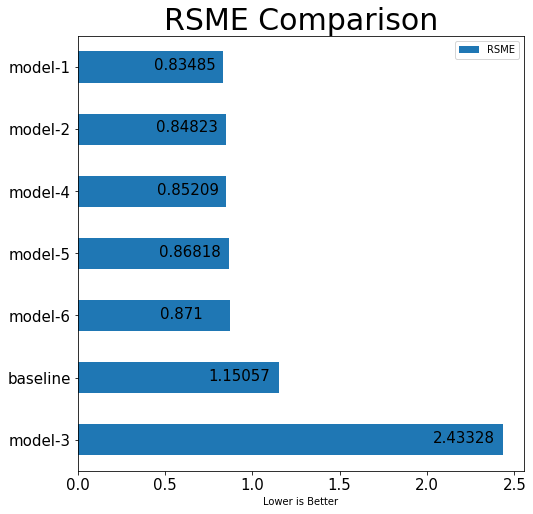

In [50]:
rsme_comparison.sort_values(by='RSME', ascending=False).plot(kind='barh', figsize=(8,8))
plt.title('RSME Comparison', fontsize=30)
plt.yticks(fontsize=15);
plt.xticks(fontsize=15);
plt.xlabel('Lower is Better')

for c, i in enumerate(rsme_comparison['RSME'].sort_values(ascending=False)):
    plt.annotate(round(i, 5), (i-0.4, c-0.05), fontsize=15)

### Problem 11: Saving the Model

Save the model as `cali_housing.h5`.  

In [52]:
# I'm saving the best one, ironically, the simplest one

In [54]:
model.save('rsme-0.8385')

Instructions for updating:
This property should not be used in TensorFlow 2.0, as updates are applied automatically.
Instructions for updating:
This property should not be used in TensorFlow 2.0, as updates are applied automatically.
INFO:tensorflow:Assets written to: rsme-0.8385/assets
